In [26]:
import yfinance as yf
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
import matplotlib.pyplot as plt 

In [21]:
data = yf.download("THYAO.IS",start="2022-08-01",end="2022-09-01")
data2 = data.copy()
data2 = data2.reset_index()
print(data2)

[*********************100%***********************]  1 of 1 completed

         Date       Open       High        Low      Close  Adj Close  \
0  2022-08-01  50.750000  51.599998  50.650002  51.500000  51.500000   
1  2022-08-02  51.799999  53.200001  51.650002  52.349998  52.349998   
2  2022-08-03  52.950001  55.000000  52.799999  55.000000  55.000000   
3  2022-08-04  55.700001  56.349998  55.099998  55.299999  55.299999   
4  2022-08-05  55.650002  58.400002  55.200001  58.200001  58.200001   
5  2022-08-08  58.400002  59.000000  57.599998  58.750000  58.750000   
6  2022-08-09  58.750000  59.650002  57.900002  58.599998  58.599998   
7  2022-08-10  58.799999  60.349998  58.599998  60.150002  60.150002   
8  2022-08-11  61.900002  62.450001  60.099998  61.400002  61.400002   
9  2022-08-12  61.849998  63.349998  61.250000  62.400002  62.400002   
10 2022-08-15  62.599998  63.650002  62.099998  63.599998  63.599998   
11 2022-08-16  63.700001  68.050003  61.700001  67.849998  67.849998   
12 2022-08-17  68.000000  69.099998  66.000000  68.699997  68.69

In [22]:
# Gün bilgisibi alalım
data2["Day"] = data2["Date"].astype(str).str.split("-").str[2]
data2.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Day
0,2022-08-01,50.750000,51.599998,50.650002,51.500000,51.500000,71659508,01
1,2022-08-02,51.799999,53.200001,51.650002,52.349998,52.349998,137217705,02
2,2022-08-03,52.950001,55.000000,52.799999,55.000000,55.000000,133031485,03
3,2022-08-04,55.700001,56.349998,55.099998,55.299999,55.299999,108646850,04
4,2022-08-05,55.650002,58.400002,55.200001,58.200001,58.200001,99647394,05


c:\Users\Kemalettin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Kemalettin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Kemalettin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


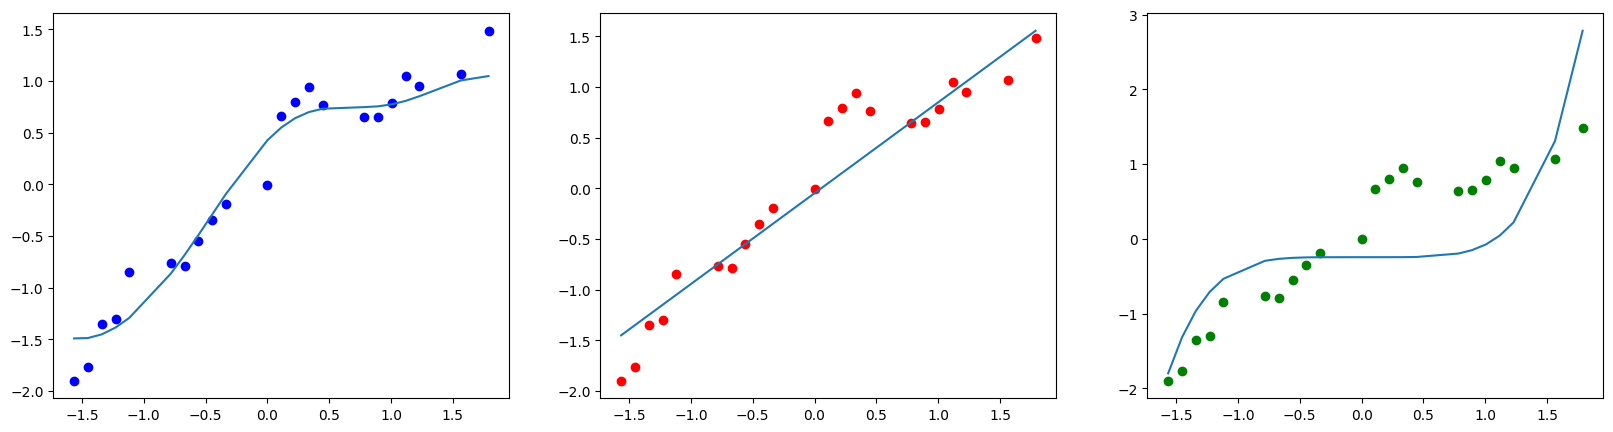

In [34]:
y = data2["Adj Close"] # kapanış fiyatlarını aldık
X = data2["Day"]

y = np.array(y).reshape(-1,1)
X = np.array(X).reshape(-1,1)

scalery = StandardScaler()
scalerX = StandardScaler()

y = scalery.fit_transform(y)
X = scalery.fit_transform(X)

model1 = SVR(kernel="rbf")
model1.fit(X,y)

model2 = SVR(kernel="linear")
model2.fit(X,y)

model3 = SVR(kernel="poly",degree=5)
model3.fit(X,y)

predictions1 = model1.predict(X)
predictions2 = model2.predict(X)
predictions3 = model3.predict(X)

fig, ax = plt.subplots(1,3,figsize=(20, 5))
ax[0].scatter(X,y,color = "blue")
ax[0].plot(X,predictions1)

ax[1].scatter(X,y,color = "red")
ax[1].plot(X,predictions2)

ax[2].scatter(X,y,color = "green")
ax[2].plot(X,predictions3)

plt.show()